In [1]:
import os
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import plotly.graph_objects as go
from plotnine import *

In [2]:
datapath99 = ('../data/cycogs/cycogsgenomes.tsv') # basic information on each genome
datapath = ('data/0/1-s2.0-S0092867422015197-mmc2.csv') # genome island coordinates
datapath3 = ('../data/cycogs/ortholog-metadata.csv') # matches geneID to cycog number
datapath4 = ('data/0/pro2_genes.csv') # alternative dataset for putative island genes

# create dataframes from datapaths
cycogs_df = pd.read_csv(datapath3)
pro2_genes_df = pd.read_csv(datapath4)
genomes_df = pd.read_csv(datapath99, sep='\t')
gi_locations_df = pd.read_csv(datapath)

In [17]:
# make a dataframe quantifying copies of pro2 genes within isolate genomes

genome_ortholog_dict = {}
isolates_df = genomes_df[genomes_df.TYPE == 'ISOLATE']
isolates_list = isolates_df.IID.tolist()
cluster_genes = pro2_genes_df[pro2_genes_df.MedianWeight.gt(0)].Ortholog.to_list()

for genome in isolates_list:
    genome_cluster_cycogs = cycogs_df[(cycogs_df.GenomeName == genome) & (cycogs_df.OrthologID.isin(cluster_genes))]
    ortholog_counts = genome_cluster_cycogs['OrthologID'].value_counts().to_dict()
    genome_ortholog_dict[genome] = ortholog_counts

# Step 2: Convert the dictionary of dictionaries to a DataFrame
df1 = pd.DataFrame.from_dict(genome_ortholog_dict, orient='index').fillna(0)
df1 = df1.transpose()
# The DataFrame 'df' now has orthologIDs as the index, genomes as columns, and the counts as the data points
display(df1)

# df1.to_csv('../data/out.csv', index=True)

,AS9601,BL107,CC9311,CC9605,CC9616,CC9902,EQPAC1,GFB01,GP2,KORDI-100,...,S-SSM6b,P-RSM4,P-SSM7,S-CAM1,S-CAM8,S-MbCM6,S-SSM4,S-SSM5,S-CBS1,S-CBS3
60000046,3.0,3.0,1.0,3.0,3.0,2.0,4.0,6.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000028,3.0,1.0,2.0,3.0,2.0,1.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000015,2.0,4.0,1.0,1.0,2.0,2.0,4.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001893,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001376,2.0,1.0,2.0,0.0,15.0,0.0,0.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60003326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60005023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# make a dictionary with any geneIDs within predicted genomic islands of the isolate genomes

REFS = '../data/img_data_cycog6/'
genome_island_dict = {}
isolates_list = isolates_df.IMG_ID.tolist()
# Loop through each genome in the directory
for genome in os.listdir(REFS):
    # Skip non-directory entries if any
    if not os.path.isdir(os.path.join(REFS, genome)):
        continue
        # Path to the GFF file for the current genome
    gff_path = os.path.join(REFS, genome, f'{genome}.gff')
    
    genome = int(genome)
    if genome in isolates_list:

        # Change genome variable to be compatible with gi_locations_df
        genome = genomes_df[genomes_df.IMG_ID == genome].IID
        genome = genome.tail(1).item()
        # print (type(genome))
        
        # Filter the dataframe for the current genome
        genome_islands_df = gi_locations_df[gi_locations_df['genome_id'] == genome]
        start_points = genome_islands_df.start.to_list()
        end_points = genome_islands_df.end.to_list()
    
        # Initialize the island_ids list for the current genome
        island_ids = []
    
        # Open and read the GFF file line by line
        with open(gff_path, 'r') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) > 3:  # Ensure there are enough parts to parse start and end
                    try:
                        start = int(parts[3])
                        end = int(parts[4])
                    except ValueError:
                        continue  # Skip lines that do not have valid integers in the expected columns
                    
                    # Check if the start and end fall within any of the specified ranges
                    for start_point, end_point in zip(start_points, end_points):
                        if start_point <= start <= end_point or start_point <= end <= end_point:
                            try:
                                island_id = int(parts[8].split('=')[1].split(';')[0])
                                island_ids.append(island_id)
                            except (IndexError, ValueError):
                                continue  # Skip lines with parsing issues in the 9th column
                            break  # Break the loop once a match is found
    
        # Store the island_ids list in the dictionary
        genome_island_dict[genome] = island_ids

print ("Genomes searched:", len(genome_island_dict))

non_empty_count = sum(1 for value in genome_island_dict.values() if len(value) > 0)
print(f"Non-empty genomic islands: {non_empty_count}")

# Optionally, print the dictionary to check the results
# for genome, ids in genome_island_dict.items():
#     print(f'Genome: {genome}, Island IDs: {ids}')

Genomes searched: 173
Non-empty genomic islands: 63


In [23]:
# make a dataframe quantifying pro2 gene copies within predicted genomic islands of isolate genomes

# Initialize the dictionary to store the results
genome_ortholog_dict = {}

# Iterate through genome_island_dict
for genome, gene_ids in genome_island_dict.items():
    ortholog_counts = defaultdict(int)  # Initialize a dictionary to count ortholog IDs
    
    # Iterate through each gene ID for the current genome
    for gene_id in gene_ids:
        # Filter cycogs_df for rows where GeneID matches gene_id
        matching_rows = cycogs_df[cycogs_df.GeneID == gene_id]
        
        # Count occurrences of each OrthologID in the filtered rows
        for ortholog_id in matching_rows.OrthologID:
            ortholog_counts[ortholog_id] += 1
    
    # Store the ortholog_counts dictionary in genome_ortholog_dict under the current genome key
    genome_ortholog_dict[genome] = dict(ortholog_counts)

# Print or use genome_ortholog_dict as needed
# print(genome_ortholog_dict)

df3 = pd.DataFrame.from_dict(genome_ortholog_dict, orient='index').fillna(0)
df3 = df3.transpose()
# The DataFrame 'df' now has genomes as the index, orthologIDs as columns, and the counts as the data points

df4 = df3[df3.index.isin(cluster_genes)]
display(df4)
# df4.to_csv('../data/step2.csv', index=True)

,MIT1205,MIT0915,MIT0801,MIT1013,MIT0918,NATL2A,MIT0912,SS120,MIT9313,MED4,...,MIT9302,MIT9322,MIT0701,MIT9107,MIT0603,MIT9311,MIT9401,GP2,MIT9314,MIT9321
60001176,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001027,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001499,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000015,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001490,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60001512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# average and combine the two dataframes for plotting

average_overlaps = df1.mean(axis=1)
average_overlaps = average_overlaps.sort_index()
average_overlaps2 = df4.mean(axis=1)
average_overlaps2 = average_overlaps2.sort_index()
average_overlaps2 = average_overlaps2.reindex(average_overlaps.index)

combined_df = pd.DataFrame({
    'OrthologID': average_overlaps.index,
    'Genome_copies': average_overlaps.values,
    'Island_copies': average_overlaps2.values
})
display (combined_df)
# combined_df.to_csv('../data/ortholog_copies.csv', index=True)

,OrthologID,Genome_copies,Island_copies
0,60000015,1.635659,0.476190
1,60000028,1.341085,0.285714
2,60000046,1.720930,0.396825
3,60000126,0.906977,0.285714
4,60000600,0.705426,0.158730
...,...,...,...
87,60005258,0.031008,NaN
88,60005558,0.054264,NaN
89,60007386,0.023256,0.015873
90,60008213,0.007752,0.015873


In [ ]:
# combined_df = pd.read_csv('../data/ortholog_copies.csv', index_col=0)
# display (combined_df)

Plotting from here

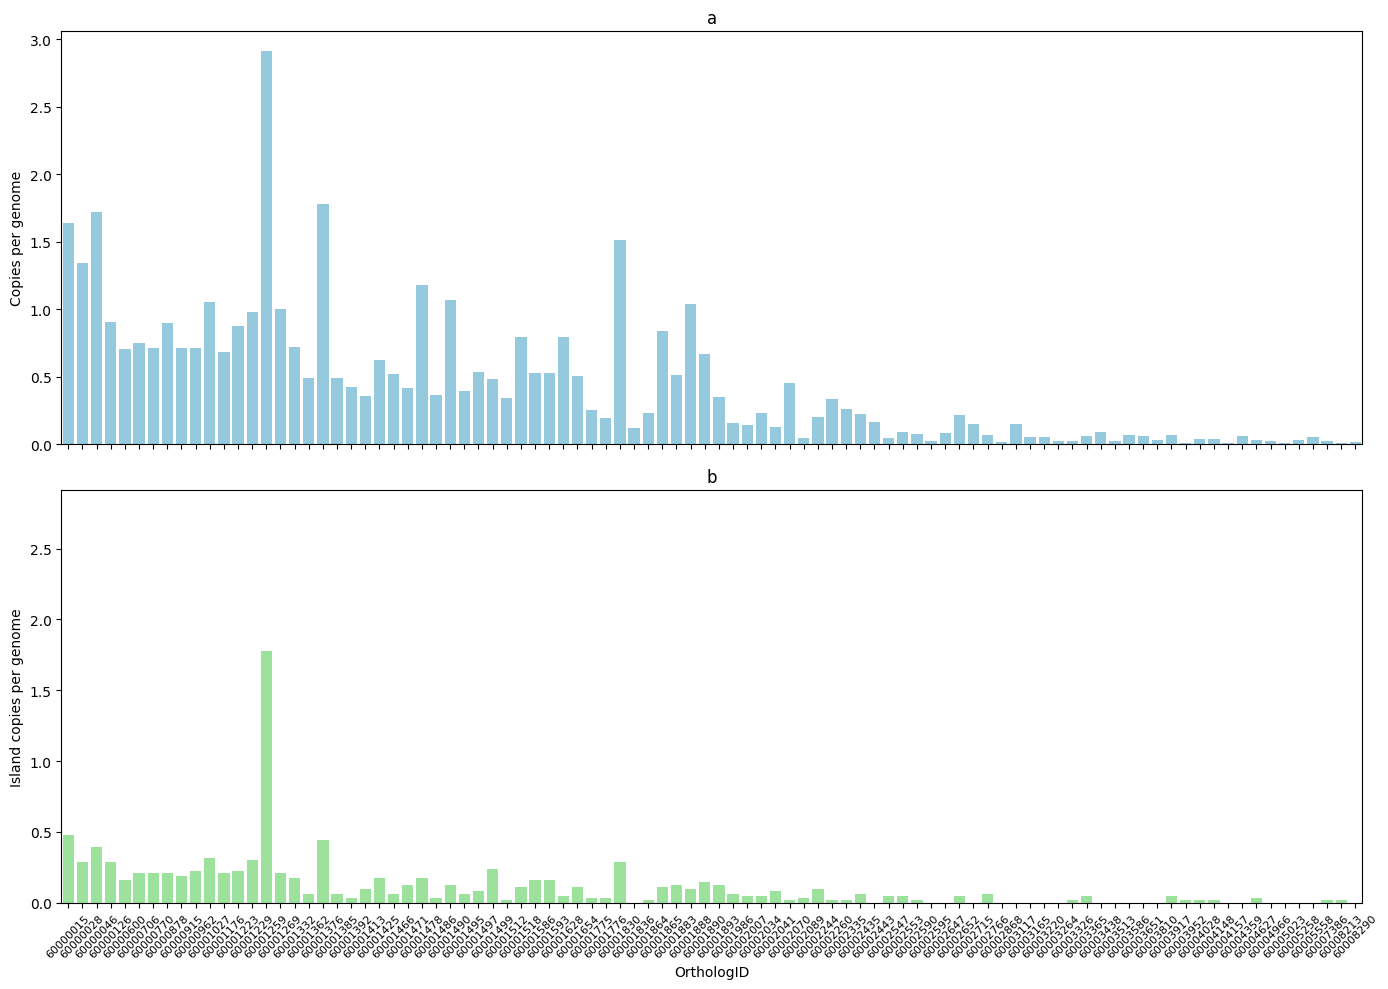

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
max_y = max(combined_df['Genome_copies'].max(), combined_df['Island_copies'].max())


# Plotting the first set of bars
sns.barplot(ax=axes[0], x='OrthologID', y='Genome_copies', data=combined_df, color='skyblue')
axes[0].set_title('a')
axes[0].set_ylabel('Copies per genome')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels

# Plotting the second set of bars
sns.barplot(ax=axes[1], x='OrthologID', y='Island_copies', data=combined_df, color='lightgreen')
axes[1].set_title('b')
axes[1].set_ylabel('Island copies per genome')
axes[1].set_xlabel('OrthologID')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels
axes[1].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

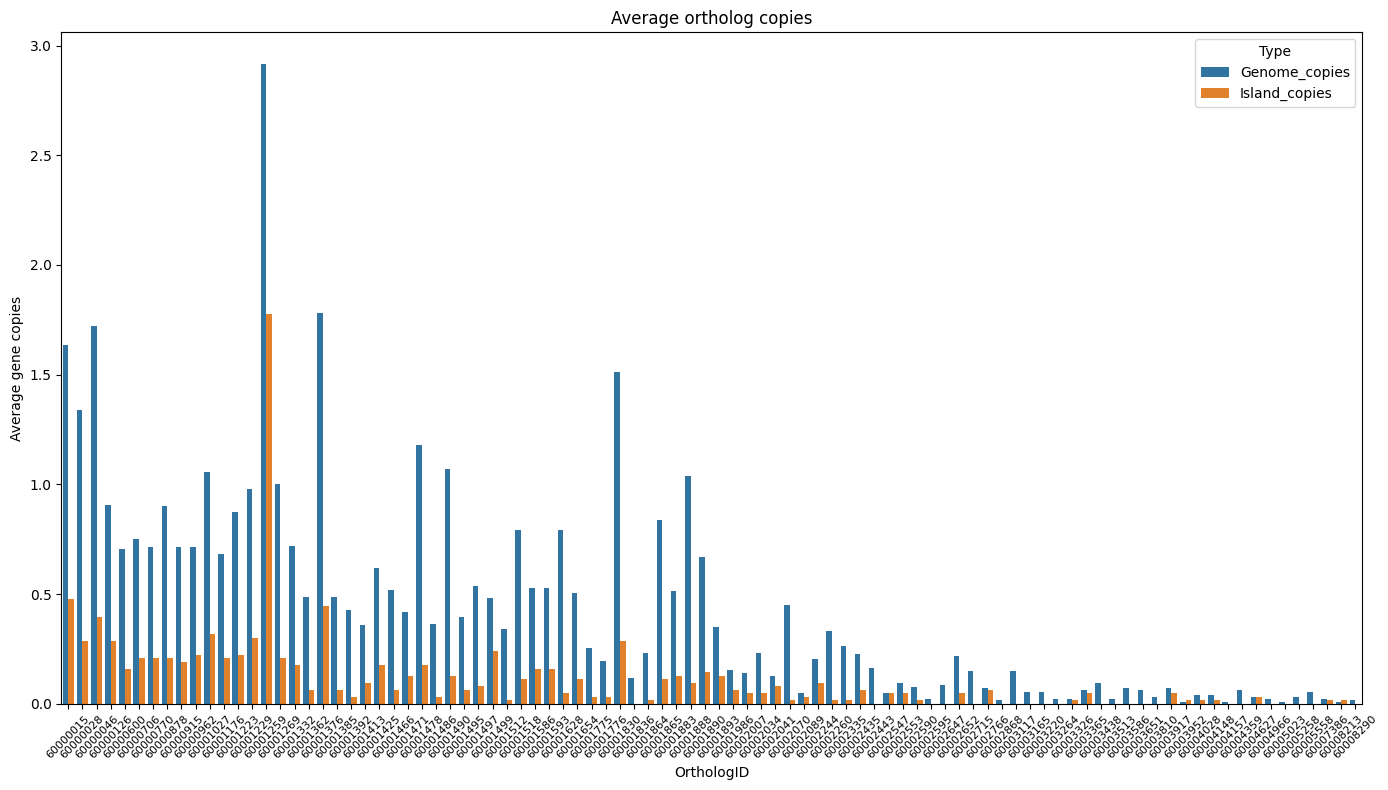

In [26]:
# Melt the DataFrame to long format
melted_df = combined_df.melt(id_vars='OrthologID', value_vars=['Genome_copies', 'Island_copies'],
                             var_name='Type', value_name='Average Overlaps')

# Plotting with seaborn
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=melted_df, x='OrthologID', y='Average Overlaps', hue='Type')

# Adding labels and title
plt.xlabel('OrthologID')
plt.ylabel('Average gene copies')
plt.title('Average ortholog copies')
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

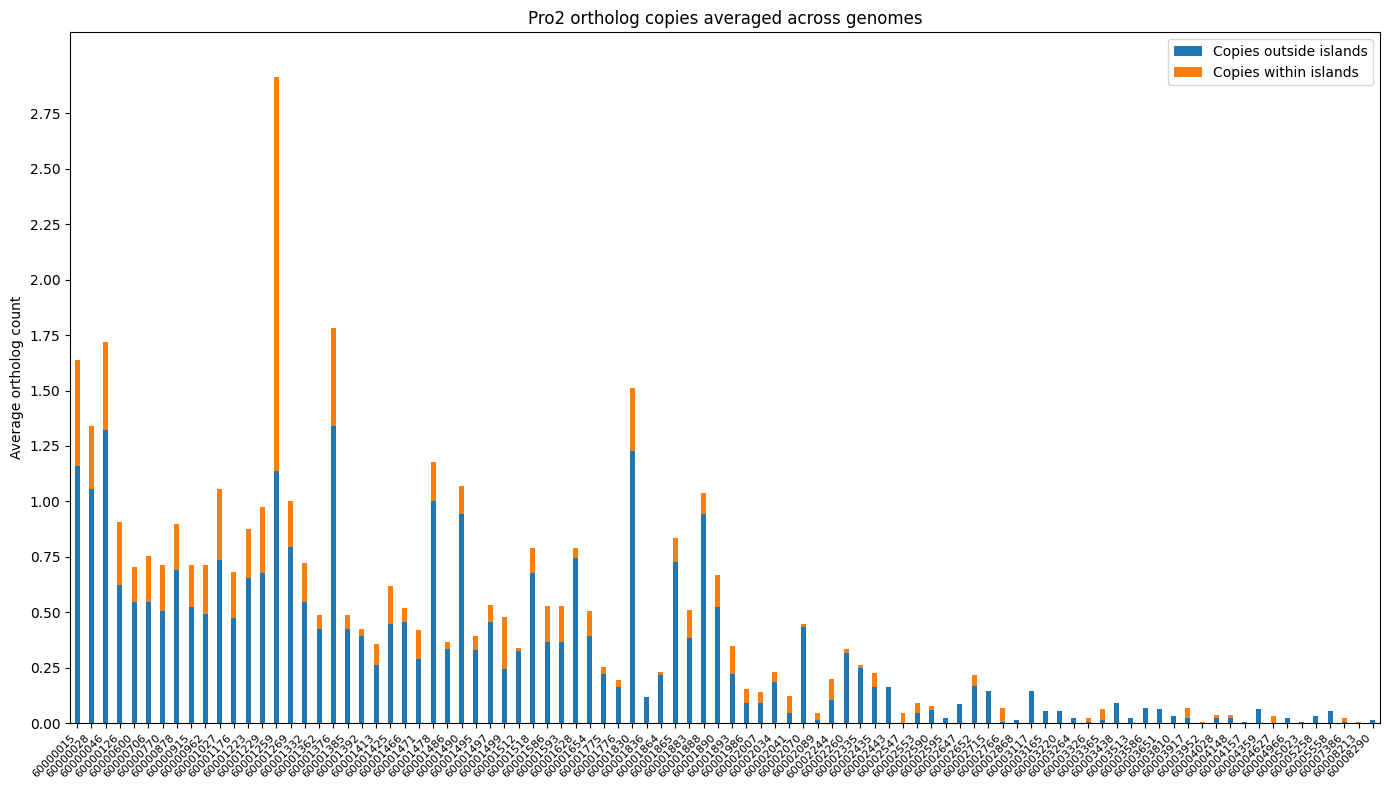

In [62]:

# Assuming your DataFrame is already populated
# combined_df = ...

# Replace NaN values with 0 in 'Genome_copies' and 'Island_copies'
boys = combined_df['Genome_copies'].fillna(0)
girls = combined_df['Island_copies'].fillna(0)
non_island = boys - girls

# Extract data for plotting
N = len(combined_df)  # Number of bars
ind = np.arange(N)  # Index array for bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))  # Get figure and axis

width = 0.35  # Width of the bars

# Plot boys' bars
p1 = ax.bar(ind, non_island, width)

# Plot girls' bars stacked on boys' bars
p2 = ax.bar(ind, girls, width, bottom=non_island)

# Customize plot
ax.set_ylabel('Average ortholog count')
ax.set_yticks(np.arange(0, max(boys), 0.25))  # Adjust y-axis ticks
ax.set_title('Pro2 ortholog copies averaged across genomes')
ax.set_xticks(ind)
ax.set_xticklabels(combined_df['OrthologID'], rotation=45, ha='right', fontsize=8)


ax.legend((p1[0], p2[0]), ('Copies outside islands', 'Copies within islands'))

# Adjust plot limits for better fit
ax.set_xlim(-0.5, N - 0.5)  # Set x-axis limits to fit all bars
ax.set_ylim(0, max(boys) + 0.2)  # Set y-axis limits with some padding

plt.tight_layout()
plt.show()
